# Machine Learning Theory
- [Free ML Book from Gareth James](http://faculty.marshall.usc.edu/gareth-james/ISL/);
- For better choosing which model to use, check out the [Scikit cheat sheet](https://scikit-learn.org/1.5/machine_learning_map.html).

## Classification Problems
- When a model tries to predict categorical values, like classes.

### Evaluating Performance
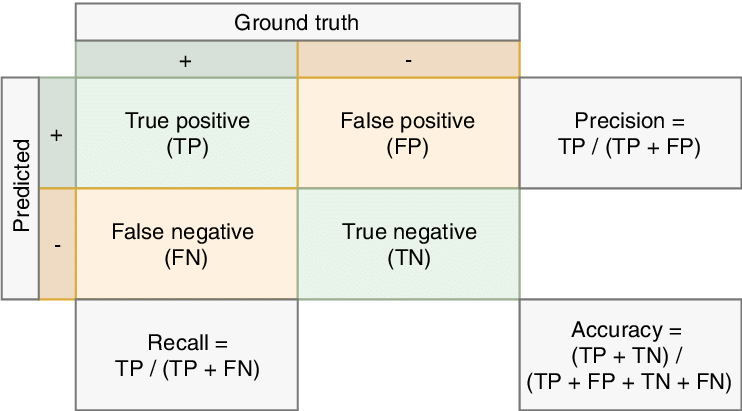


- **Accuracy**
  - Number of correct predictions divided by the total number of predictions;
  - Useful when target classes are well balanced (same ammount of classes through data);
  - Not a good choice with unbalanced classes.

- **Recall**
  - Ability of a model to find all the relevant cases within a dataset;
  - True positives divided by all ground truth.

- **Precision**
  - Ability of a model to identify only the relevant data points;
  - True positives divided by all predicted truth.

- **F1-Score**
  - Optimal blend of precision and recall;
  - Harmonic mean of precision and recall:

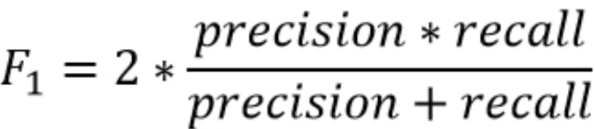

### Recall and Precision Tradeoff
- High recall = model finds all relevant instances;
- High precision = model gets a higher proportion of the points right;
- F1-Score is a good way to balance both.
  - Harmonic mean punishes extreme values. If either recall or precision are small, f1-score will be VERY small.

Because of the tradeoff, our model can focus on either fixing false positives or false negatives. Decreasing one increases the other.
- Choosing where to focus requires a good ammount of **Domain Knowledge**;
- For example: In disease diagnosis, it's probably better to minimize false negatives, since these exams are normally preliminary before doing a more invasive exam.

## Regression Problems
- When a model tries to predict continuous values.

### Evaluating Performance

- **Mean Absolute Error (MAE)**: Mean of the absolute value of errors.
  - Won't punish large errors.
 
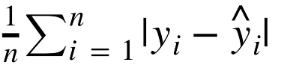

- **Mean Squared Error (MSE)**: Mean of the squared value of errors.
  - Larger errors are noted more compared with MAE.
 
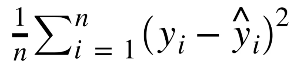

- **ROOT Mean  Squared Error (RMSE)**: Mean of the absolute value of errors.
  - MSE also squares the units themselves, so by taking the root we end up with the same units.

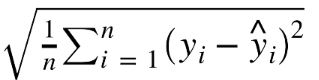

- **Bias**: The bias error is an error from erroneous assumptions in the learning algorithm.
  - High bias can cause an algorithm to miss the relevant relations between features and target outputs **(underfitting)**;

- **Variance**: The variance is an error from sensitivity to small fluctuations in the training set.
  - High variance may result from an algorithm modeling the random noise in the training data **(overfitting)**.

### Bias and Variance Tradeoff
- Before training the model, it has low variance and high bias;
- As we add model complexity and the model begins to fit, the bias goes down;
- However we also start adding random noise, and the variance goes up;
- The training error goes down, and the test error goes up;
- The model begins to **overfit** on new data;

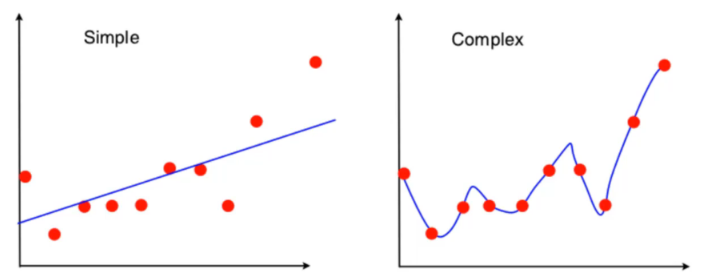

- On the Graph Below, we see how models with different complexities fit on the data.

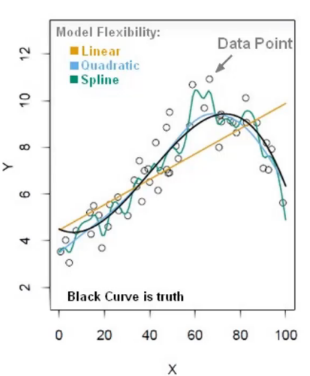

- We can also plot bias and variance of the models:
  
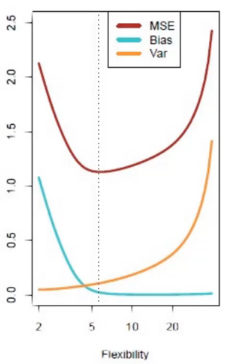 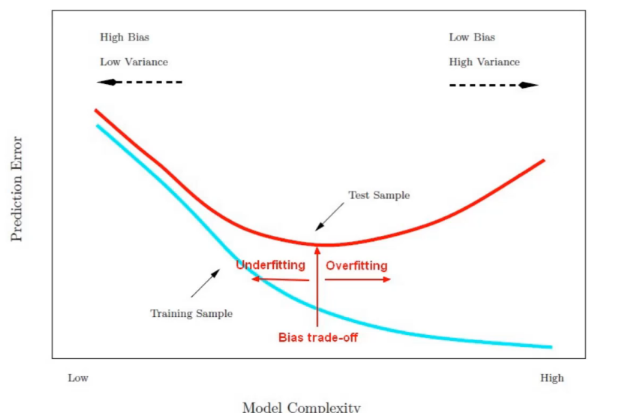

- An analogy of Bias and Variance is frequently made with Targets:

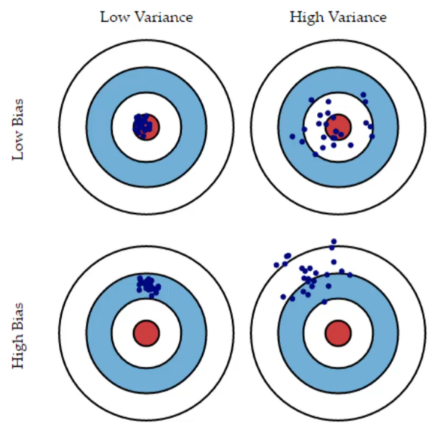

- [Some people have critized using 4 targets](https://medium.com/@ivanreznikov/stop-using-the-same-image-in-bias-variance-trade-off-explanation-691997a94a54) (because high variance and bias doesn't make sense) and instead opt for this:

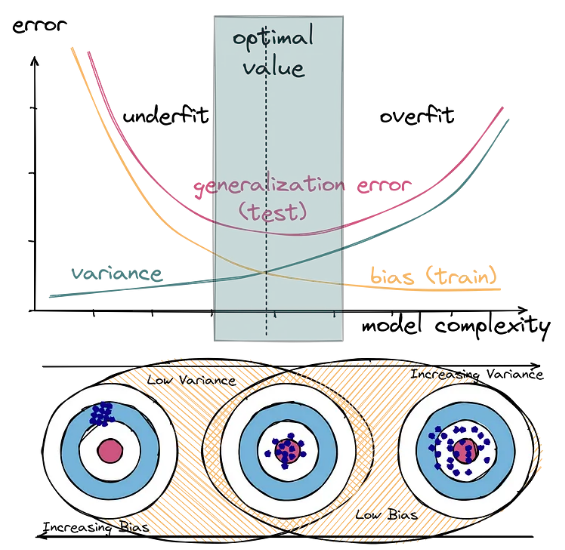

Some general tips are:
- Compare your error metric to the average value of the label in your data set to try to get an intuition of its overall performance;
- Domain knowledge plays an important role here! You need to understand the problem and its context.

## Steps of Training a ML Model

To create and train a Machine Learning Model in Python with Pandas, we normally follow the steps:

**1) Get the data**
- Import the data using functions from Pandas, such as `read_csv`.

**2) Understand the data**
- Use different data visualization tools for Exploratory Data Analysis.

**3) Prepare the data**
- Check the data for missing values, convert types, create new features with feature engineering, etc.

**4) Split the data**

- To avoid overfitting, we normally split a dataset into 3 groups:
  - **Training data**: train model parameters;
  - **Validation data**: determine what model hyperparameters to adjust;
  - **Test Data**: to get some final performance metric.

- Once you run your model on the test data, that's the performance you'd have in the real world. NEVER adjust your model weights and parameters based on the test data.

**5) Choose the Model**
- By your undestanding of the Data, choose the model that best fits the problem you're solving;
- You can always use the [Scikit Cheat Sheet](https://scikit-learn.org/1.5/machine_learning_map.html) to help.

**6) Train the Model**
- Fit the Training Data to the model.

**7) Evaluate the Model**
- Use the model to predict values from the validation split;
- This won't be possible on problems of Unsupervised Learning where we don't have access to the labels;
- Use the metrics and your domain knowledge to evaluate how well the model performed.

**8) Tune the Model**
- Change hyperparameters of the Model;
- Retrain and Reevaluate until it provides satisfactory metrics.

**9) Get the Final Metrics**
- Use the test-split to evaluate the final metrics of the model;
- After getting the predictions, do not retrain or change hyperparameters, or else the metrics generated won't be valid.

- Please note that all these steps aren't always necessary;
- For these learning notebooks we'll be skipping some of these steps;
- This fluxogram can also be used as references of the ML Lifecycle:

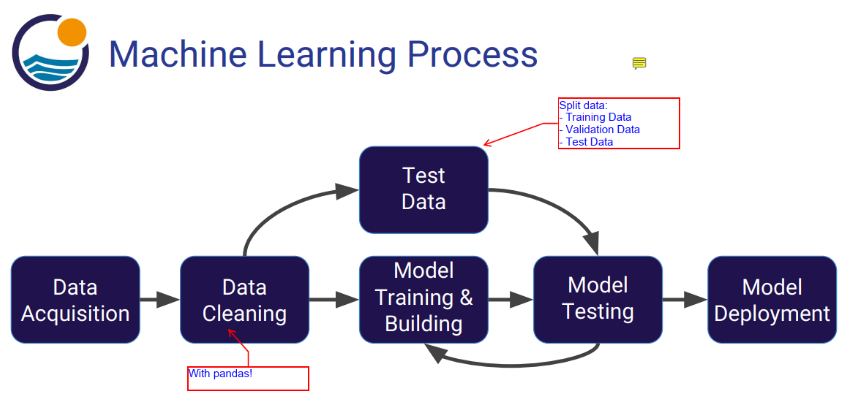

# Using Scikit-Learn

- We'll be using `scikit-learn` to perform Machine Learning with Python.

In [86]:
# Imports
import numpy as np

1) Import the Estimator

- Every algorithm is exposed via an "Estimator object":
```Python
from sklearn.family import Model
```

For example:

In [88]:
from sklearn.linear_model import LinearRegression # LinearRegression = Estimator

2) Instantiate the estimator
- Pass the appropriate parameters (use shift+tab to check the possibilities and the default values)

In [90]:
model = LinearRegression()
model

LinearRegression()

3) Split the data
- This can be done with train_test_split from sklearn!

4) Use the model to fit the data
   
- `model.fit()`: fit training data
  - For supervised learning we use data X and labels y: `model.fit(X,y)`
  - For unsupervised learning we use only the data X: `model.fit(X)`
    
5) Make predictions, if the model allows for it!

Available in *Supervised Estimators*:
- `model.predict()`: given a trained model, predict the label of a new set
- `model.predict_proba()`: returns the probability that a new observation has each categorical label.
- `model.score()`: indicates the fit

Available in *Unsupervised Estimators*:
- `model.predict()`: predicts labels in clustering algorithms
- `model.transform()`: transforms new data into new basis
- `model.fit_transform()`: better performs a fit with a transform

# Linear Regression
- [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) problems can be solved using the [Least Squares Method](https://en.wikipedia.org/wiki/Least_squares), which is fitted by minimizing the sum of squares of residuals;
  - A residual is the difference between the observation and the fitted line.    

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1) Get the data**

In [96]:
df = pd.read_csv('data/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


**2) Undestand the data**
- We'll try to predict price values based of the numeric features;
- Normally here we'd do `df.describe` and `df.info`;
- This is better covered in the EDA Tips and Tricks notebook;
- We can do a displot of the prices to check their distribution:

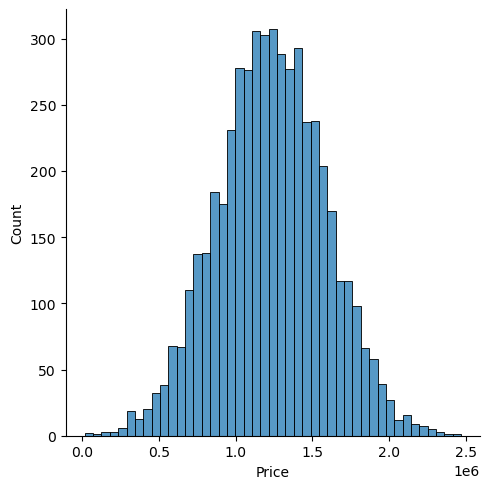

In [98]:
sns.displot(df['Price'])

**3) Prepare the data**

In [100]:
# Get everything but price (will be our labels) and address (because it is non-numeric)

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

## Training

**4) Split the data**

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [105]:
# Test size: percentage of dataset alocated to the test dataset
# Random state: ensures specific set of test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [106]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

**5) Choose the Model**
- Since we're trying to evaluate numeric prices, we'll choose a Linear Regression model.

**6) Train the Model**

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
# Instantiate a LinearRegression Object

lm = LinearRegression()
lm

LinearRegression()

In [110]:
lm.fit(X_train, y_train)

LinearRegression()

- Let's check out some of the properties of the fitted model.

In [112]:
# Intercept: Point where the line crosses the Y Axis

lm.intercept_

-2640159.7968525267

In [113]:
# All the coeficients for each feature (each coeficient relate to one column)

lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [114]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [115]:
# How to interpret coefficients:
# If we hold all other features fixed, an 1 unit increase in Avg. Area Income is associated with an increase of 21.52 dollars in Price
# etc...

cdf = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [116]:
predictions = lm.predict(X_test)

## Evaluation
**7) Evaluate the model**
- To properly evaluate a Linear Regression Model, we use linear regression metrics:
  - Mean Absolute Error (MAE);
  - Mean Squared Error (MSE);
  - Root Mean Squared Error (RMSE) - The most common.
  - R Squared - [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
    - Indicates the percentage of variance that your model explains
    - The closer to 1, the better the fit.
- Plotting the residuals is also a good idea!  

In [118]:
from sklearn import metrics

In [119]:
# MAE
metrics.mean_absolute_error(y_test, predictions)

82288.22251914947

In [120]:
# MSE
metrics.mean_squared_error(y_test, predictions)

10460958907.209059

In [121]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290936

In [122]:
# R Squared
metrics.explained_variance_score(y_test, predictions)

0.9178179926151833

- Notice that the below plot is a straight line. That is a good indication that this is a good fit.

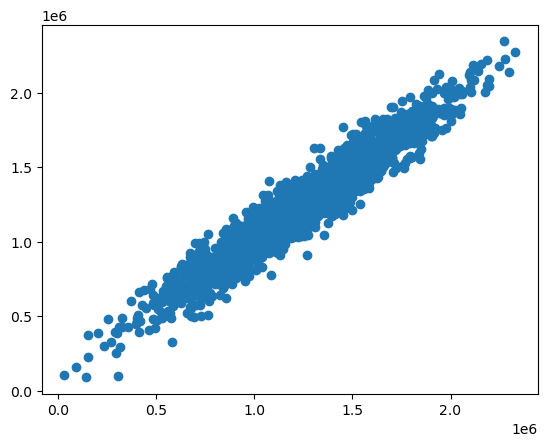

In [149]:
plt.scatter(y_test, predictions)

- Notice how the residuals are normalized. This also indicates a good fit.

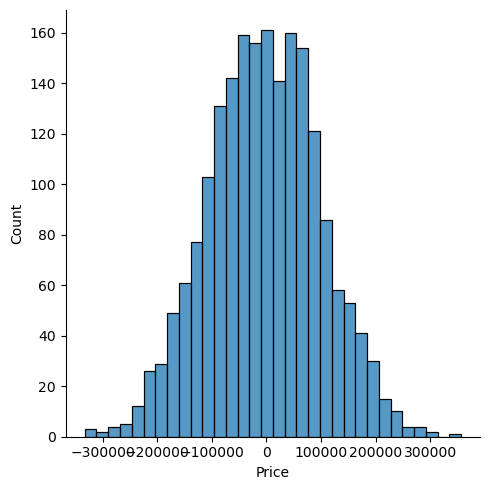

In [153]:
sns.displot((y_test - predictions))

# Logistic Regression
- [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) problems deal with binary classification tasks.

In [132]:
from sklearn.linear_model import LogisticRegression

In [134]:
train = pd.read_csv('data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- We first need to deal with missing data on this dataset.

<Axes: >

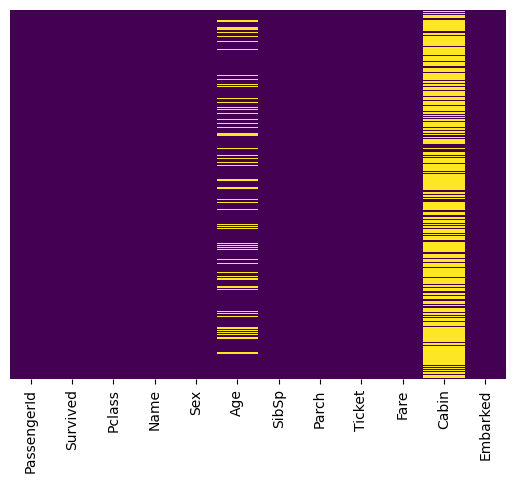

In [137]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- The column 'Cabin' has too many missing values to be useful. We'll first drop this column.

In [62]:
train.drop('Cabin', axis=1, inplace=True)

- The column 'Age' has only a few missing values. We will use [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) (fill missing data) to deal with this. We do this based on the passenger PClass.

In [142]:
means = train[['Age', 'Pclass']].groupby('Pclass').mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return means.loc[Pclass].item()
    return Age

train['Age'] = train['Age'].fillna(value=train[['Age', 'Pclass']].apply(impute_age, axis=1))

C:\Users\pedro\AppData\Local\Temp\ipykernel_21348\4074614699.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\pedro\AppData\Local\Temp\ipykernel_21348\4074614699.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


- There should be only a few missing values left. For those, we'll simply drop the rows.

In [145]:
train.shape[0]

891

In [147]:
train.dropna(inplace=True)
train.shape[0]

202

## Preprocessing
- We need to convert all categorical features to binary columns;
- We do that with `get_dummies`.

In [70]:
pd.get_dummies(train['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


- Above: We cannot feed both columns into the ML model, because one is a perfect predictor of the other (Multi-colinearity).
- We need to pass the 'drop_first' argument:

In [72]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


- For classes with n unique values, we'll generate n-1 columns:

In [74]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [75]:
train = pd.concat([train, sex, embark], axis=1)
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


- Note that Pclass is being treated as an integer;
- We could convert `Pclass` to categories with get_dummies.

## Training

In [78]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression(max_iter=500)

logmodel

LogisticRegression(max_iter=500)

In [79]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [80]:
predictions = logmodel.predict(X_test)

## Evaluation

- For classification, sklearn has methods that already calculates all measurements!

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [149]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 31  73]]


# K-Nearest Neighbors
- K-Nearest Neighbors is one of the simplest classification algorithms that operates based on neighbor proximity.

In [167]:
df = pd.read_csv('data/Classified Data', index_col=0)

In [169]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Preprocessing
- Since KNN relies on distance, the SCALE of the variables matter a LOT. So it is wise to standardize the scale of every column.
- You should always scale the training set and test sets separately to avoid **DATA LEAKAGE**;
  - We don't want to assume we have prior information of the test set!

In [175]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
scaler

StandardScaler()

In [183]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [185]:
# Use the scaler object to do a transformation
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1)) # Performs a standartization by centering and scaling
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [187]:
 df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [189]:
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


- With this, all values are standardized.

## Training

In [199]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

## Evaluation

In [207]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Tuning
- It is important to choose the best K value for our usecase;
- We do this by training classifiers with multiple values of K and choosing the one with an acceptable error (and isn't too high, to save on computations).

In [211]:
np.mean(pred != y_test) # Average of where predictions where not equal to test values

0.07666666666666666

In [213]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test)) 

Text(0, 0.5, 'Error rate')

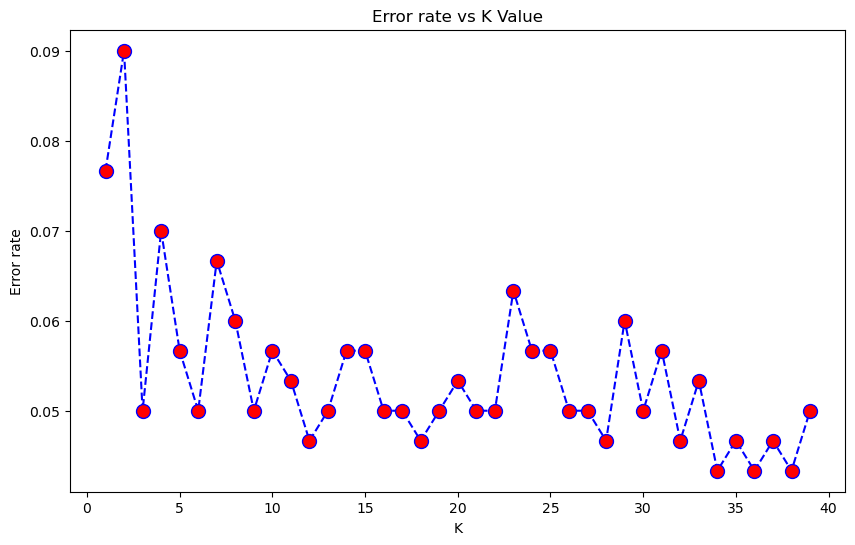

In [216]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

- Based on this graph, 18 seems to be a good choice.

In [219]:
knn = KNeighborsClassifier(n_neighbors= 18)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Decision Trees
- Decision Trees are intuitive and fast methods for predicting outcomes;
- [Blog post](https://towardsdatascience.com/enchanted-random-forest-b08d418cb411#.hh7n1co54) about decision trees.

In [233]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
df = pd.read_csv('data/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Training

In [237]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluation

In [240]:
predictions = dtree.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[20  3]
 [ 2  0]]


              precision    recall  f1-score   support

      absent       0.91      0.87      0.89        23
     present       0.00      0.00      0.00         2

    accuracy                           0.80        25
   macro avg       0.45      0.43      0.44        25
weighted avg       0.84      0.80      0.82        25



# Random Forests
- Random Forests are concepts built on top of decision trees to enhance performance.
  Random forests are normally better in larger datasets. In the below dataset it didn't make much difference because the dataset is tiny, and the 'Kyphosis' column is unbalanced (more cases of being absent);
- They are perfect for a quick accurate prediction to indicate you're on the right track.

In [249]:
from sklearn.ensemble import RandomForestClassifier

## Training

In [254]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Evaluation

In [257]:
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[21  2]
 [ 2  0]]


              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        23
     present       0.00      0.00      0.00         2

    accuracy                           0.84        25
   macro avg       0.46      0.46      0.46        25
weighted avg       0.84      0.84      0.84        25



# Support Vector Machines
- Support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis;
- Best to standardize the data before feeding it to a Support Vector Classifier.
- SVMs has two important Hyperparameters:
  - **C**: Controls the cost of misclassification on the training data.
      - Large C value gives low bias and high variance (because you penalize the cost of misclassification a lot).
      - Small C value gives high bias and low variance.
  - **Gamma**: Free parameter of the gaussian radial basis function (default kernel: rbf)
      - Large Gamma value gives high bias and low variance (the support vector does not have a widespread influence).
      - Small Gamma value gives low bias and high variance.

In [264]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Classifier

### Training

In [269]:
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [280]:
from sklearn.svm import SVC # classifier

In [282]:
model = SVC()
model.fit(X_train, y_train)

SVC()

### Evaluation

In [287]:
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



### Tuning
- We will use a gridsearch to search for the best parameters (like what C and gamma values to use).

In [292]:
from sklearn.model_selection import GridSearchCV

# keys: parameters
# values: list of settings to be tested
param_grid = {'C':[0.1,1,10,100,100], 'gamma':[1,0.1,0.01,0.001,0.0001]}

# GridSearchCV is a meta-estimator. Takes one estimator and creates a new one that behaves the same.
grid = GridSearchCV(SVC(), param_grid, verbose=3) #Higher the number of verbose, the more text output.

# First, runs the same loop with cross-validation to find the best parameter combination
# Once it has the best parameter combination, it runs fit again on the data without cross-validation.
# So it builds a SINGLE new model with the best parameter settings.
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [294]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [296]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [298]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# K-Means Clustering
- K Means Clustering is an unsupervised learning algorithm that will attempt to group similar clusters together in your data.

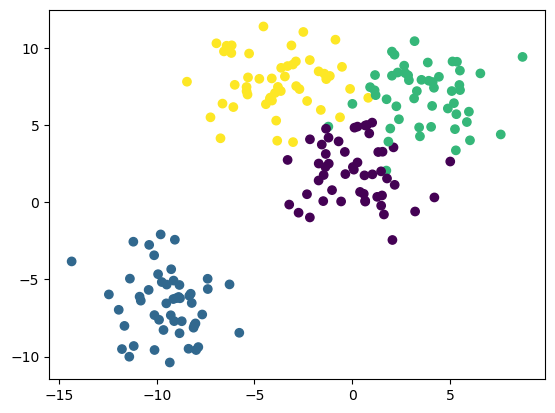

In [334]:
# Generating artificial data
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

firstcolumn = data[0][:,0]
secondcolumn = data[0][:,1]
plt.scatter(firstcolumn, secondcolumn, c=data[1])

## Training

In [324]:
from sklearn.cluster import KMeans

In [328]:
kmeans = KMeans(n_clusters = 4)

kmeans.fit(data[0])

C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [330]:
# Centroids of the clusters
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [336]:
# Labels it believes to be true
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

## Evaluation
- With real data, we wouldn't have the actual labels, so we would be done at this stage. However, since we created the data, we can compare to the original model.

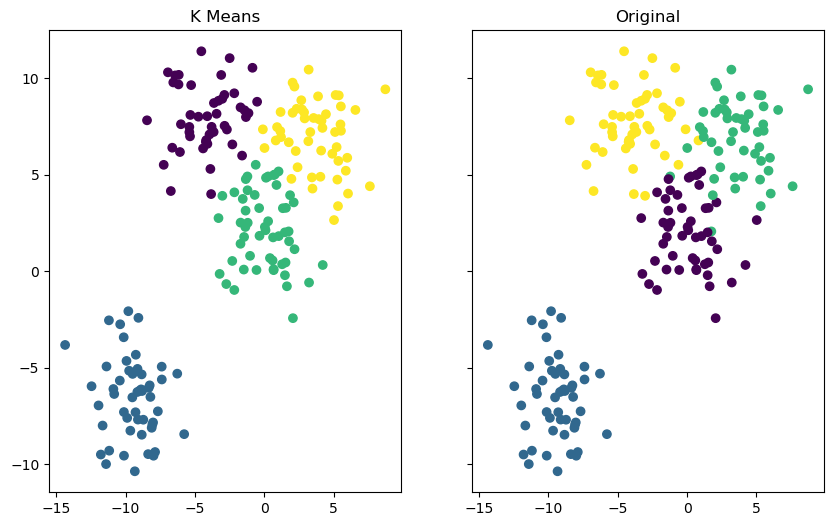

In [341]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(firstcolumn, secondcolumn, c=kmeans.labels_)

ax2.set_title('Original')
ax2.scatter(firstcolumn, secondcolumn, c=data[1])

# Principal Component Analysis

- Principal Component Analysis is an unsupervised statistical technique used to examine the interrelations among a set of variables in order to identify the underlying structure of those variables;
- Basically, it tries to find which components explain the most variance in the dataset;
- It is **NOT A ML MODEL**, it's simply a good analysis to do first before creating a ML Model;
- Also very good for condensing several features together and making the dataset smaller;
- PCA is very similar to other scalers, after all it's just transformations.

In [346]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocessing
- You'll first need to standardize the values so performance isn't compromised.

In [352]:
from sklearn.preprocessing import StandardScaler

In [354]:
scaler = StandardScaler()

scaler.fit(df)

scaled_data = scaler.transform(df)

## Usage

In [358]:
from sklearn.decomposition import PCA

- We wanna keep just the most important 2 components so we can visualize them in a 2D space.

Text(0, 0.5, 'Second Principal Component')

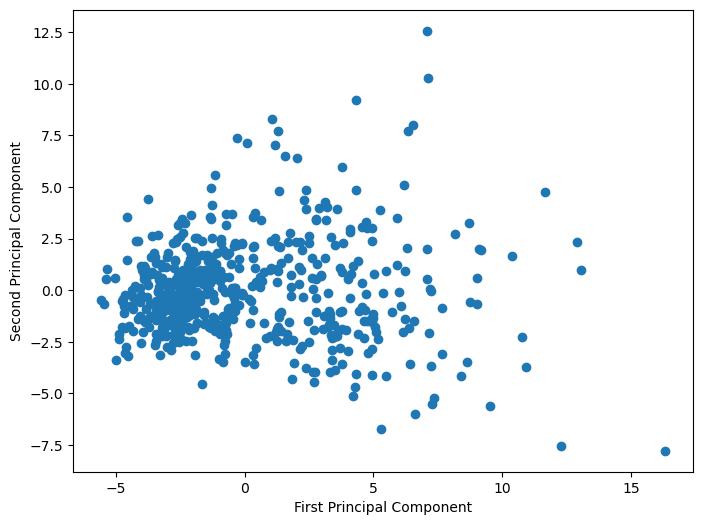

In [364]:
pca = PCA(n_components = 2)

pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1]) # x_pca[:,0] gets all the rows from column 0
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Interpretation

- Interpreting these components is actually really hard. But we can see how this technique is powerful by using the target column:

Text(0, 0.5, 'Second Principal Component')

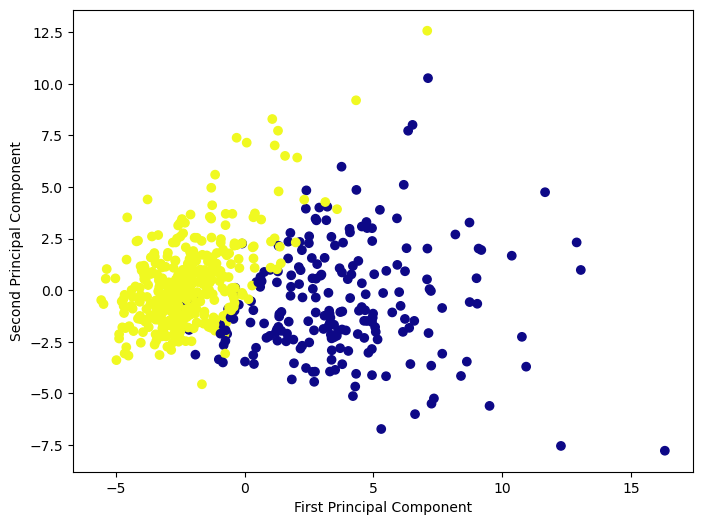

In [374]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

- Based only on the first 2 components we have a VERY CLEAR separation of the malign tumors X benign tumors.
- This can be used, therefore, as a "compression algorithm":
  - We are keeping a lot of information and still explaining a lot of the variance, but doing it with only 2 columns of data instead of 30.
- The components correspond to combinations of the original features;
- They are stored as an attribute of the fitted PCA object.
  - Stored as a numpy array on `.components_`;
  - Each row represents a Principal Component;
  - Each column relates back to the original features.

In [385]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

- We can visualize the relation of the columns to the original features with a heatmap.

In [390]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

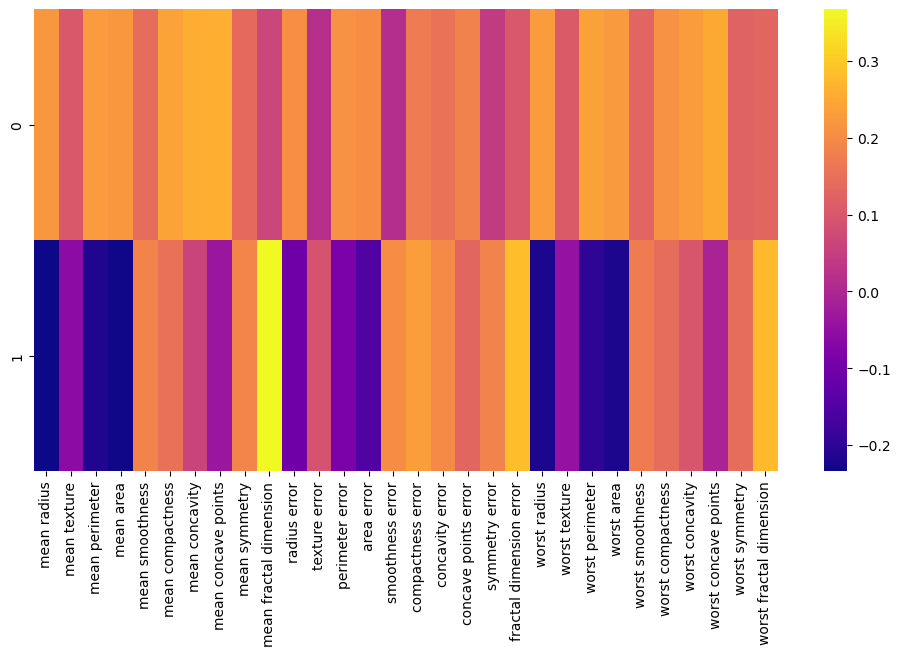

In [392]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

- Each Principal Component is a Row;
- Higher numbers means more correlation to a specific feature in the columns;
- They are, furthermore, combination of all these features;
- You can see which features were specifcally important in one component versus the other.

# Recommender Systems
- Systems built to give recommendations;
- Fully deployed recommender systems are HARD and require a good background in Linear Algebra;
- **Collaborative Filtering** systems are based on other users' attitude to items and produce better results;
- **Content-Based** systems focus on the attributes of the items.
- We'll do a simple Collaborative Filtering system.

In [401]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('data/u.data', sep='\t', names=columns_names)
movie_titles = pd.read_csv('data/Movie_Id_Titles')

df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


## Preprocessing
- We'll use a pivot table to get user_id, rating and title into a matrix form;
- Missing values: User didn't see the movie.

In [404]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We'll grab the ratings of 'Star Wars'.

In [425]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [429]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## Usage

- We can get the correlation between 2 Pandas series with `corrwith`. Checking the docs:

```
Pairwise correlation is computed between rows or columns of
DataFrame with rows or columns of Series or DataFrame. DataFrames
are first aligned along both axes before computing the
correlations.
```

- This will allow us to get titles and the correlations of every other movie to that specific User Behavior on the StarWars movie.

In [431]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

C:\Users\pedro\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\pedro\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\pedro\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pedro\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\pedro\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

- If we get and sort the dataframe by correlation, we get the most similar movies.

In [434]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation']).dropna()
corr_starwars.sort_values(by='Correlation', ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


- Note that some results may not make sense. These movies are perfectly correlated to StarWars and noone really knows them;
- This happens because these movies were probably seen by only one person who also happened to rate StarWars 5 stars;
- We fix this by excluding movies with little number of reviews.

In [437]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation']).dropna()
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values(by='Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
